In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import pickle

In [2]:
trndata = pd.read_csv('data-2019-2020_3.csv')
# trndata= trndata.loc[trndata['PATIENTSERVICE'] == "IP"]
trndata.head()

,Sheet Name,UHID,INPATIENTNO,AGE,GENDER,PATIENTSERVICE,No of Days from Admission,Ward Type,SPECIMENNAME,Organismname,...,Rifampicin,Sparfloxacin,Teicoplanin,Tetracycline,Ticarcillin + Clavulanic,Tigecycline,Tobramycin,Trimethoprim / sulfamethoxazole,Vancomycin,Variconazole
0,Delhi,APD1.0010001529,DEL1OPP244979,50.0,MALE,OP,0.0,NaN,Urine,Klebsiella pneumoniae,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Delhi,APD1.0010956961,DEL1OPP2169735,49.0,MALE,OP,0.0,NaN,Urine,Proteus mirabilis,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,Delhi,APD1.0010000602,DELIP237166,84.0,MALE,IP,11.0,Critical Care,BAL,Acinetobacter baumanii,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN
3,Delhi,APD1.0010930075,DELIP228652,72.0,MALE,IP,78.0,Critical Care,BAL,Providencia rettgeri,...,NaN,NaN,NaN,0.0,1.0,NaN,1.0,NaN,NaN,NaN
4,Delhi,APD1.0010930075,DELIP228652,72.0,MALE,IP,78.0,Critical Care,Urine,Proteus mirabilis,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
trndata.shape

(107427, 94)

In [4]:
data2 =  trndata[['Sheet Name','AGE','GENDER','No of Days from Admission','PATIENTSERVICE','Ward Type','SPECIMENNAME','Organismname']]
data2 = data2.dropna()

In [5]:
# data2.to_excel("to_predict.xlsx")
data2.shape

(67867, 8)

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data2, test_size=0.05, random_state = 123)
test.shape

(3394, 8)

In [3]:
data = pd.read_pickle(open('data-2019-20_4.pkl','rb'))

dnr_org_anti = pd.read_excel('not to report.xlsx')
dnr_specimen_anti = pd.read_excel('not_report_specimen_to_antibitoic.xlsx')

for i,j in zip(dnr_org_anti.bacteria,dnr_org_anti.antibiotic):
    
    for item in j.strip().split(','):
        data = data.drop((data[(data.Organismname == i) & (data.antibiotic == item)].index))

for i,j in zip(dnr_specimen_anti.specimen, dnr_specimen_anti.antibiotic):
    
    for item in j.strip().split(','):
        data = data.drop((data[(data.SPECIMENNAME == i) & (data.antibiotic == item)].index))


In [15]:
trial_data= data.loc[data['SPECIMENNAME'] == "Pus"]
trial_data




,Sheet Name,AGE,GENDER,PATIENTSERVICE,SPECIMENNAME,Organismname,antibiotic,Value,IP-OP
394,Delhi,83.0,MALE,OP,Pus,Escherichia coli,Amikacin,1.0,Both
395,Delhi,83.0,MALE,OP,Pus,Escherichia coli,Amoxicillin+Clavulanate,1.0,OP
396,Delhi,83.0,MALE,OP,Pus,Escherichia coli,Cefepime,1.0,IP
397,Delhi,83.0,MALE,OP,Pus,Escherichia coli,Cefoperazone + Sulbactam,1.0,IP
398,Delhi,83.0,MALE,OP,Pus,Escherichia coli,Ceftazidime,1.0,IP
...,...,...,...,...,...,...,...,...,...
1497100,Nashik,54.0,MALE,IP,Pus,Klebsiella pneumoniae,Levofloxacin,1.0,Both
1497101,Nashik,54.0,MALE,IP,Pus,Klebsiella pneumoniae,Meropenem,1.0,IP
1497102,Nashik,54.0,MALE,IP,Pus,Klebsiella pneumoniae,Piperacillin + Tazobactam,1.0,IP
1497103,Nashik,54.0,MALE,IP,Pus,Klebsiella pneumoniae,Tigecycline,0.5,IP


In [16]:
Counter(trial_data.Organismname)

Counter({'Escherichia coli': 25033,
         'Staphylococcus aureus': 18602,
         'Streptococcus pneumoniae': 708,
         'Acinetobacter baumanii': 957,
         'Klebsiella pneumoniae': 13711,
         'Enterococcus faecalis': 2281,
         'Citrobacter freundii': 933,
         'Proteus mirabilis': 2433,
         'Enterobacter cloacae': 2610,
         'Morganella morganii': 1222,
         'Serratia species': 235,
         'Streptococci species': 1317,
         'Coagulase negative staphylococcus': 2675,
         'Pseudomonas aeruginosa': 7968,
         'Corynebacterium species': 240,
         'Stenotrophomonas maltophilia': 69,
         'Alcaligens species': 23,
         'Aeromonas species': 89,
         'Providencia rettgeri': 233,
         'Flavobacterium spp': 12,
         'Burkholderia cepacia': 102,
         'Haemophilus influenzae': 15,
         'Morganella': 114,
         'Burkholderia pseudomallei': 271,
         'Non-fermenting Gram negative bacilli': 28,
         'Ente

In [17]:
# test['AGE'] = test['AGE'].fillna(65.0)
# test['Ward Type'] = test['Ward Type'].fillna('Wards')

# data['AGE'] = data['AGE'].fillna(65.0)
# data['Ward Type'] = data['Ward Type'].fillna('Wards')
test = test.dropna()

In [18]:
data2['AGE'] = data2['AGE'].astype(int) 
test['AGE'] = test['AGE'].astype(int) 
# train['AGE'] = train['AGE'].astype(int)

In [19]:
Counter(data['PATIENTSERVICE'])

Counter({'OP': 337611, 'IP': 502662, 'AHC': 504})

In [22]:
cnt = 0

org1 = []
org2 = []
org3 = []
org4 = []
org5 = []
org6 = []
org4new = []


num_1 = []
num_2 = []
num_3 = []


from tqdm import tqdm

for tmp_data in tqdm(data2.iterrows()):  
#     print(len(org1))
#     if cnt == 10:
#         break
        
#     cnt+=1
#     print (tmp_data)
#     features = [x for x in tmp_data['data']]
#     print(features)
    place = tmp_data[1]['Sheet Name']
    age = tmp_data[1]['AGE']
#     print(age)
    gender = tmp_data[1]['GENDER']
    i = tmp_data[1]['SPECIMENNAME']
    j = tmp_data[1]['PATIENTSERVICE']
#     k = tmp_data[1]['Ward Type']
    org6.append(age)
    # df  = data[data['SPECIMENNAME'] == i]
    if age < 1:
        df = data[(data['SPECIMENNAME'] == i)  & (data['GENDER'] == gender)  &  (data['AGE'] < 1) & (data['PATIENTSERVICE'] == j)]
    elif (age >= 1 & age <5):
        df = data[(data['SPECIMENNAME'] == i) & (data['GENDER'] == gender) & ((data['AGE'] >= 1) & (data['AGE'] < 5)) & (data['PATIENTSERVICE'] == j)]
    elif (age >= 5 & age <18):
        df = data[(data['SPECIMENNAME'] == i)  & (data['GENDER'] == gender) & ((data['AGE'] >= 5) & (data['AGE'] < 18)) & (data['PATIENTSERVICE'] == j)]
    elif (age >= 18 & age <35):
        df = data[(data['SPECIMENNAME'] == i)  & (data['GENDER'] == gender) & ((data['AGE'] >= 18) & (data['AGE'] < 35)) & (data['PATIENTSERVICE'] == j)]
    elif (age >= 35 & age <50):
        df = data[(data['SPECIMENNAME'] == i)  & (data['GENDER'] == gender) & ((data['AGE'] >= 35) & (data['AGE'] < 50)) & (data['PATIENTSERVICE'] == j)]
    elif (age >= 50 & age <65):
        df = data[(data['SPECIMENNAME'] == i)  & (data['GENDER'] == gender) & ((data['AGE'] >= 50) & (data['AGE'] < 65)) & (data['PATIENTSERVICE'] == j)]
    elif(age >= 65):
        df = data[(data['SPECIMENNAME'] == i)  & (data['GENDER'] == gender) & (data['AGE'] >= 65) & (data['PATIENTSERVICE'] == j)]
    
    
    if df.empty == True:
        
        org1.append("NA")
        org2.append("NA")
        org3.append("NA")
        org4new.append("NA")
#         org4.append("Insufficient Data")
        org5.append(i)
    
        
        num_1.append(0)
        num_2.append(0)
        num_3.append(0)
            
        # text = {'content':"Sufficient data not available"}
#         less_data = "Sufficient data not available"
        
#         final_output = pd.DataFrame(columns=['Organism_Name'])
#         final_output['Organism_Name'] = [1,2,3]
#         final_output['Antibiotic_1'] = None
#         final_output['Antibiotic_2'] = None
#         final_output['Antibiotic_3'] = None
        # temp = text.to_dict('record')
        # return jsonify(text)
#         final_output= final_output.to_dict('records')
#         final_output2 = [{'table':final_output, 'content': less_data}]
        # temp = final_output2('records')
#         return jsonify(final_output2)
        
        
    else:
        org5.append(i)
        row_count = df.shape[0]
        less_data = ""
        if row_count <= 30:
#             less_data += 'Calculated from fewer than the standard recommendation of 30 isolates'
            org4.append("Insufficient Data")
            
    
        elif row_count > 30:
            org4.append("Enough Data")
        for_percent = df.groupby(['Organismname'])['Value'].count().sort_values(ascending=False).reset_index().rename_axis(None, axis=1)
    
        count_df = df.groupby(['Organismname'])['Value'].count().sort_values(ascending=False).reset_index().rename_axis(None, axis=1)
        
#         print(sum(count_df['Value']))
        percent = for_percent['Value']/sum(for_percent['Value'])
#         count_df['val'] = count_df['Value']
#         df['Percent'] = percent
#         print(percent)
        anti =df['Organismname'].value_counts()[:3].sort_values(ascending=False)
        print(count_df)
        
        if cnt==20:
            break
        cnt+=1
        anti_num = anti
#         print(anti[0])
        anti = list(anti.index)
        
#         print(anti)
#         final_output = pd.DataFrame(columns=['Organism_Name','Percent'])#columns=['Organism Name','Antibiotic 1','Antibiotic 2','Antibiotic 3'])
#         final_output['Organism_Name_1'] = anti
#         print(anti[0],anti[1],anti[2])

        if len(anti) == 0:
            org1.append("NA")
            org2.append("NA")
            org3.append("NA")
#             org4new.append("NA")
            
            num_1.append(0)
            num_2.append(0)
            num_3.append(0)
            
#         elif len(anti) == 4:
#             org1.append(anti[0])
#             org2.append(anti[1])
#             org3.append(anti[2])
#             org4new.append(anti[3])
            
#             num0,num1,num2 = anti_num[0],anti_num[1],anti_num[2]
            
        elif len(anti) == 1:
            org1.append(anti[0])
            org2.append("NA")
            org3.append("NA")
#             org4new.append("NA")
            num0 = anti_num[0]
            num_1.append(percent[0])
            num_2.append(0)
            num_3.append(0)
            
        elif len(anti) == 2:
            org1.append(anti[0])
            org2.append(anti[1])
            org3.append("NA")
#             org4new.append("NA")
            
#             num0,num1 = anti_num[0],anti_num[1]
            num_1.append(percent[0])
            num_2.append(percent[1])
            num_3.append(0)
            
        elif len(anti) == 3:
            org1.append(anti[0])
            org2.append(anti[1])
            org3.append(anti[2])
#             org4new.append("NA")
#             num0,num1,num2 = anti_num[0],anti_num[1],anti_num[2]
            num_1.append(percent[0])
            num_2.append(percent[1])
            num_3.append(percent[2])
            
            
        else:
            break
        
#         try:
        
#             org1.append(anti[0])
#             print(len(org1))
#             org2.append(anti[1])
#             org3.append(anti[2])
#         except IndexError:
#             gotdata = 'null'
# #             pass
# #         continue

1it [00:00,  2.75it/s]

                   Organismname  Value
0              Escherichia coli     25
1         Klebsiella pneumoniae     18
2          Enterobacter cloacae     17
3     Burkholderia pseudomallei     16
4         Staphylococcus aureus     14
5           Serratia marcescens     12
6  Stenotrophomonas maltophilia     12
7             Moraxella Species      7
8          Burkholderia cepacia      5
9        Acinetobacter baumanii      2


2it [00:00,  2.64it/s]

                   Organismname  Value
0              Escherichia coli     25
1         Klebsiella pneumoniae     18
2          Enterobacter cloacae     17
3     Burkholderia pseudomallei     16
4         Staphylococcus aureus     14
5           Serratia marcescens     12
6  Stenotrophomonas maltophilia     12
7             Moraxella Species      7
8          Burkholderia cepacia      5
9        Acinetobacter baumanii      2


3it [00:01,  2.58it/s]

              Organismname  Value
0         Escherichia coli    855
1    Klebsiella pneumoniae    327
2        Proteus mirabilis    149
3    Enterococcus faecalis    124
4         Proteus vulgaris    114
5     Enterobacter cloacae     79
6      Morganella morganii     66
7   Pseudomonas aeruginosa     47
8    Staphylococcus aureus     26
9     Enterococcus faecium     19
10    Citrobacter freundii     16
11        Serratia species     15
12  Acinetobacter baumanii      8
13              Morganella      6
14    Streptococci species      4
15        Candida albicans      2


4it [00:01,  2.56it/s]

                         Organismname  Value
0   Coagulase negative staphylococcus    143
1                    Escherichia coli    140
2               Klebsiella pneumoniae    136
3               Staphylococcus aureus     89
4              Pseudomonas aeruginosa     80
5                    Salmonella typhi     71
6            Streptococcus pneumoniae     47
7                                 GNB     46
8                Burkholderia cepacia     35
9              Acinetobacter baumanii     33
10                   Acinetobacter sp     27
11               Streptococci species     27
12               Enterobacter cloacae     21
13       Chryseobacterium indologenes     12
14           Non typhoidal Salmonella     11
15                Pseudomonas species     11
16                  Aeromonas species     11
17              Enterococcus faecalis     10
18                    Vibrio cholerae     10


5it [00:01,  2.51it/s]

            Organismname  Value
0   Burkholderia cepacia      3
1  Enterococcus faecalis      3
2  Klebsiella pneumoniae      2


6it [00:02,  2.64it/s]

              Organismname  Value
0         Escherichia coli    855
1    Klebsiella pneumoniae    327
2        Proteus mirabilis    149
3    Enterococcus faecalis    124
4         Proteus vulgaris    114
5     Enterobacter cloacae     79
6      Morganella morganii     66
7   Pseudomonas aeruginosa     47
8    Staphylococcus aureus     26
9     Enterococcus faecium     19
10    Citrobacter freundii     16
11        Serratia species     15
12  Acinetobacter baumanii      8
13              Morganella      6
14    Streptococci species      4
15        Candida albicans      2


7it [00:02,  2.78it/s]

             Organismname  Value
0   Klebsiella pneumoniae     19
1  Pseudomonas aeruginosa     14
2  Acinetobacter baumanii      3
3        Acinetobacter sp      2
4    Burkholderia cepacia      1


8it [00:02,  2.84it/s]

             Organismname  Value
0  Pseudomonas aeruginosa     34


9it [00:03,  2.89it/s]

                   Organismname  Value
0              Escherichia coli     25
1         Klebsiella pneumoniae     18
2          Enterobacter cloacae     17
3     Burkholderia pseudomallei     16
4         Staphylococcus aureus     14
5           Serratia marcescens     12
6  Stenotrophomonas maltophilia     12
7             Moraxella Species      7
8          Burkholderia cepacia      5
9        Acinetobacter baumanii      2


10it [00:03,  2.99it/s]

                   Organismname  Value
0              Escherichia coli     25
1         Klebsiella pneumoniae     18
2          Enterobacter cloacae     17
3     Burkholderia pseudomallei     16
4         Staphylococcus aureus     14
5           Serratia marcescens     12
6  Stenotrophomonas maltophilia     12
7             Moraxella Species      7
8          Burkholderia cepacia      5
9        Acinetobacter baumanii      2


11it [00:03,  2.95it/s]

             Organismname  Value
0   Klebsiella pneumoniae     19
1  Pseudomonas aeruginosa     14
2  Acinetobacter baumanii      3
3        Acinetobacter sp      2
4    Burkholderia cepacia      1


12it [00:04,  3.03it/s]

              Organismname  Value
0         Escherichia coli    855
1    Klebsiella pneumoniae    327
2        Proteus mirabilis    149
3    Enterococcus faecalis    124
4         Proteus vulgaris    114
5     Enterobacter cloacae     79
6      Morganella morganii     66
7   Pseudomonas aeruginosa     47
8    Staphylococcus aureus     26
9     Enterococcus faecium     19
10    Citrobacter freundii     16
11        Serratia species     15
12  Acinetobacter baumanii      8
13              Morganella      6
14    Streptococci species      4
15        Candida albicans      2


13it [00:04,  2.98it/s]

                         Organismname  Value
0   Coagulase negative staphylococcus    143
1                    Escherichia coli    140
2               Klebsiella pneumoniae    136
3               Staphylococcus aureus     89
4              Pseudomonas aeruginosa     80
5                    Salmonella typhi     71
6            Streptococcus pneumoniae     47
7                                 GNB     46
8                Burkholderia cepacia     35
9              Acinetobacter baumanii     33
10                   Acinetobacter sp     27
11               Streptococci species     27
12               Enterobacter cloacae     21
13       Chryseobacterium indologenes     12
14           Non typhoidal Salmonella     11
15                Pseudomonas species     11
16                  Aeromonas species     11
17              Enterococcus faecalis     10
18                    Vibrio cholerae     10


14it [00:04,  2.94it/s]

                         Organismname  Value
0   Coagulase negative staphylococcus    199
1                    Escherichia coli    141
2               Klebsiella pneumoniae    139
3               Staphylococcus aureus    137
4              Acinetobacter baumanii    130
5                    Salmonella typhi    116
6            Streptococcus pneumoniae     87
7                Enterobacter cloacae     65
8                Streptococci species     54
9                   Aeromonas species     40
10              Enterococcus faecalis     35
11                   Acinetobacter sp     33
12            Corynebacterium species     32
13                Pseudomonas species     21
14             Pseudomonas aeruginosa     19
15             Salmonella paratyphi A     16
16               Burkholderia cepacia     13
17          Sphingomonas paucimobilis     10
18             Streptococcus pyogenes      6
19       Stenotrophomonas maltophilia      5
20               Enterococcus faecium      3


15it [00:05,  2.93it/s]

                         Organismname  Value
0   Coagulase negative staphylococcus    199
1                    Escherichia coli    141
2               Klebsiella pneumoniae    139
3               Staphylococcus aureus    137
4              Acinetobacter baumanii    130
5                    Salmonella typhi    116
6            Streptococcus pneumoniae     87
7                Enterobacter cloacae     65
8                Streptococci species     54
9                   Aeromonas species     40
10              Enterococcus faecalis     35
11                   Acinetobacter sp     33
12            Corynebacterium species     32
13                Pseudomonas species     21
14             Pseudomonas aeruginosa     19
15             Salmonella paratyphi A     16
16               Burkholderia cepacia     13
17          Sphingomonas paucimobilis     10
18             Streptococcus pyogenes      6
19       Stenotrophomonas maltophilia      5
20               Enterococcus faecium      3


16it [00:05,  2.81it/s]

                   Organismname  Value
0              Escherichia coli     25
1         Klebsiella pneumoniae     18
2          Enterobacter cloacae     17
3     Burkholderia pseudomallei     16
4         Staphylococcus aureus     14
5           Serratia marcescens     12
6  Stenotrophomonas maltophilia     12
7             Moraxella Species      7
8          Burkholderia cepacia      5
9        Acinetobacter baumanii      2


17it [00:05,  2.93it/s]

              Organismname  Value
0         Escherichia coli    855
1    Klebsiella pneumoniae    327
2        Proteus mirabilis    149
3    Enterococcus faecalis    124
4         Proteus vulgaris    114
5     Enterobacter cloacae     79
6      Morganella morganii     66
7   Pseudomonas aeruginosa     47
8    Staphylococcus aureus     26
9     Enterococcus faecium     19
10    Citrobacter freundii     16
11        Serratia species     15
12  Acinetobacter baumanii      8
13              Morganella      6
14    Streptococci species      4
15        Candida albicans      2


18it [00:06,  2.84it/s]

                         Organismname  Value
0   Coagulase negative staphylococcus    199
1                    Escherichia coli    141
2               Klebsiella pneumoniae    139
3               Staphylococcus aureus    137
4              Acinetobacter baumanii    130
5                    Salmonella typhi    116
6            Streptococcus pneumoniae     87
7                Enterobacter cloacae     65
8                Streptococci species     54
9                   Aeromonas species     40
10              Enterococcus faecalis     35
11                   Acinetobacter sp     33
12            Corynebacterium species     32
13                Pseudomonas species     21
14             Pseudomonas aeruginosa     19
15             Salmonella paratyphi A     16
16               Burkholderia cepacia     13
17          Sphingomonas paucimobilis     10
18             Streptococcus pyogenes      6
19       Stenotrophomonas maltophilia      5
20               Enterococcus faecium      3


19it [00:06,  2.87it/s]

             Organismname  Value
0   Klebsiella pneumoniae     19
1  Pseudomonas aeruginosa     14
2  Acinetobacter baumanii      3
3        Acinetobacter sp      2
4    Burkholderia cepacia      1


20it [00:07,  2.81it/s]

              Organismname  Value
0         Escherichia coli    855
1    Klebsiella pneumoniae    327
2        Proteus mirabilis    149
3    Enterococcus faecalis    124
4         Proteus vulgaris    114
5     Enterobacter cloacae     79
6      Morganella morganii     66
7   Pseudomonas aeruginosa     47
8    Staphylococcus aureus     26
9     Enterococcus faecium     19
10    Citrobacter freundii     16
11        Serratia species     15
12  Acinetobacter baumanii      8
13              Morganella      6
14    Streptococci species      4
15        Candida albicans      2


20it [00:07,  2.70it/s]

                         Organismname  Value
0   Coagulase negative staphylococcus    199
1                    Escherichia coli    141
2               Klebsiella pneumoniae    139
3               Staphylococcus aureus    137
4              Acinetobacter baumanii    130
5                    Salmonella typhi    116
6            Streptococcus pneumoniae     87
7                Enterobacter cloacae     65
8                Streptococci species     54
9                   Aeromonas species     40
10              Enterococcus faecalis     35
11                   Acinetobacter sp     33
12            Corynebacterium species     32
13                Pseudomonas species     21
14             Pseudomonas aeruginosa     19
15             Salmonella paratyphi A     16
16               Burkholderia cepacia     13
17          Sphingomonas paucimobilis     10
18             Streptococcus pyogenes      6
19       Stenotrophomonas maltophilia      5
20               Enterococcus faecium      3


In [16]:
percent[2]

0.208955223880597

In [18]:
# cnt = 0

# org1 = []
# org2 = []
# org3 = []
# org4 = []
# org5 = []
# org6 = []
# from tqdm import tqdm

# for tmp_data in tqdm(test.iterrows()):  
# #     print(len(org1))
# #     if cnt == 500:
# #         break
        
# #     cnt+=1
# #     print (tmp_data)
# #     features = [x for x in tmp_data['data']]
# #     print(features)
#     age = tmp_data[1]['AGE']
# #     print(age)
#     gender = tmp_data[1]['GENDER']
#     i = tmp_data[1]['SPECIMENNAME']
#     j = tmp_data[1]['PATIENTSERVICE']
# #     k = tmp_data[1]['Ward Type']
#     org6.append(age)
#     # df  = data[data['SPECIMENNAME'] == i]
#     if age < 1:
#         df = data[(data['SPECIMENNAME'] == i)  & (data['GENDER'] == gender)  &  (data['AGE'] == 0) & ((data['IP-OP'] == 'Both') | (data['IP-OP'] == j))]
#     elif (age >= 1 & age <5):
#         df = data[(data['SPECIMENNAME'] == i) & (data['GENDER'] == gender)  & ((data['AGE'] >= 1) & (data['AGE'] < 5)) & ((data['IP-OP'] == 'Both') | (data['IP-OP'] == j))]
#     elif (age >= 5 & age <12):
#         df = data[(data['SPECIMENNAME'] == i)  & (data['GENDER'] == gender) & ((data['AGE'] >= 5) & (data['AGE'] < 12)) & ((data['IP-OP'] == 'Both') | (data['IP-OP'] == j))]
#     elif (age >= 12 & age <18):
#         df = data[(data['SPECIMENNAME'] == i) & (data['GENDER'] == gender)  & (data['Ward Type'] == k) & ((data['AGE'] >= 12) & (data['AGE'] < 18)) & ((data['IP-OP'] == 'Both') | (data['IP-OP'] == j))]
#     elif (age >= 18 & age <45):
#         df = data[(data['SPECIMENNAME'] == i) & (data['GENDER'] == gender)  & ((data['AGE'] >= 18) & (data['AGE'] < 45)) & ((data['IP-OP'] == 'Both') | (data['IP-OP'] == j))]
#     elif (age >= 45 & age <65):
#         df = data[(data['SPECIMENNAME'] == i)  & (data['GENDER'] == gender) & ((data['AGE'] >= 45) & (data['AGE'] < 65)) & ((data['IP-OP'] == 'Both') | (data['IP-OP'] == j))]
#     elif(age >= 65):
#         df = data[(data['SPECIMENNAME'] == i) & (data['GENDER'] == gender)  & (data['AGE'] >= 65) & ((data['IP-OP'] == 'Both') | (data['IP-OP'] == j))]
    
    
#     if df.empty == True:
        
#         org1.append("NA")
#         org2.append("NA")
#         org3.append("NA")
#         org4.append("Insufficient Data")
#         org5.append(i)
            
#         # text = {'content':"Sufficient data not available"}
# #         less_data = "Sufficient data not available"
        
# #         final_output = pd.DataFrame(columns=['Organism_Name'])
# #         final_output['Organism_Name'] = [1,2,3]
# #         final_output['Antibiotic_1'] = None
# #         final_output['Antibiotic_2'] = None
# #         final_output['Antibiotic_3'] = None
#         # temp = text.to_dict('record')
#         # return jsonify(text)
# #         final_output= final_output.to_dict('records')
# #         final_output2 = [{'table':final_output, 'content': less_data}]
#         # temp = final_output2('records')
# #         return jsonify(final_output2)
        
        
#     else:
#         org5.append(i)
#         row_count = df.shape[0]
#         less_data = ""
#         if row_count <= 30:
# #             less_data += 'Calculated from fewer than the standard recommendation of 30 isolates'
#             org4.append("Insufficient Data")
            
    
#         elif row_count > 30:
#             org4.append("Enough Data")
            
#         count_df = df.groupby(['ORGANISMNAME','antibiotic'])['Value'].count().sort_values(ascending=False).reset_index().rename_axis(None, axis=1)
#         anti =df['ORGANISMNAME'].value_counts()[:3].sort_values(ascending=False)
# #         print(anti)
#         anti = list(anti.index)
        
        
#         final_output = pd.DataFrame(columns=['Organism_Name'])#columns=['Organism Name','Antibiotic 1','Antibiotic 2','Antibiotic 3'])
# #         final_output['Organism_Name_1'] = anti
# #         print(final_output)

#         if len(anti) == 0:
#             org1.append("NA")
#             org2.append("NA")
#             org3.append("NA")
            
#         elif len(anti) == 1:
#             org1.append(anti[0])
#             org2.append("NA")
#             org3.append("NA")

            
#         elif len(anti) == 2:
#             org1.append(anti[0])
#             org2.append(anti[1])
#             org3.append("NA")
            
#         elif len(anti) == 3:
#             org1.append(anti[0])
#             org2.append(anti[1])
#             org3.append(anti[2])
            
#         else:
#             break
        
# #         try:
        
# #             org1.append(anti[0])
# #             print(len(org1))
# #             org2.append(anti[1])
# #             org3.append(anti[2])
# #         except IndexError:
# #             gotdata = 'null'
# # #             pass
# # #         continue

In [19]:
test.shape

(51731, 7)

In [17]:
final = pd.DataFrame()

In [18]:
# final['Organism_true'] = train['Organismname']
final = data2
final['Org_pred_1'] = org1
final['Org_pred_2'] = org2
final['Org_pred_3'] = org3
# final['Org_pred_4_new'] = org4new
# final['Org_pred_4'] = org4
# final['Specimen'] = org5
# final['Age'] = org6

final['Org_prob_1'] = num_1
final['Org_prob_2'] = num_2
final['Org_prob_3'] = num_3




In [19]:
final.to_csv("complete_data_3.csv")

In [12]:
final = pd.read_csv('for_val_match21.csv')


In [13]:
precision = 0
recall = 0
total = 0
loss = []
squared_error = []

for index, row in final.iterrows():
    total +=1
    if row['Organism_true'] == row['Org_pred_1']:
        loss.append(1 - row['Org_prob_1'])
        squared_error.append(pow((1 - row['Org_prob_1']),2))
        precision += 1
        recall += 1
        
    elif row['Organism_true'] == row['Org_pred_2']:
        loss.append(1 - row['Org_prob_2'])
        squared_error.append(pow((1 - row['Org_prob_2']),2))
        
        precision += 1
        recall += 1
    
    elif row['Organism_true'] == row['Org_pred_3']:
        loss.append(1 - row['Org_prob_3'])
        squared_error.append(pow((1 - row['Org_prob_3']),2))
        precision += 1
        recall += 1
# print("Classification Metric")
print("")
print("Precision : ",(precision/total))       
print("recall : ",recall/total)

print("")
print("Mean Absolute Error (MAE) : ",sum(loss)/total)
print("Mean Squared Error (MSE) : ",sum(squared_error)/total)


Precision :  0.5980540610200071
recall :  0.5980540610200071

Mean Absolute Error (MAE) :  0.3825337243623573
Mean Squared Error (MSE) :  0.27807995450185097


In [55]:
print("Root Mean Squared Error (RMSE) : ",pow((sum(squared_error)/total),1/2))

Root Mean Squared Error (RMSE) :  0.5288061089790373


In [48]:
import seaborn as sns

<AxesSubplot:xlabel='SPECIMENNAME', ylabel='AGE'>

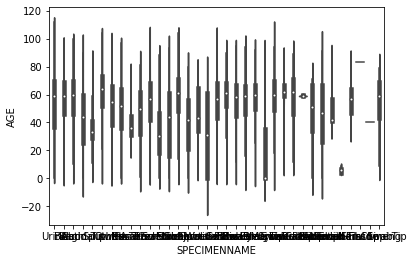

In [51]:
sns.violinplot(x ="SPECIMENNAME",
             y ="AGE",
             data = data)

<AxesSubplot:xlabel='PATIENTSERVICE', ylabel='AGE'>

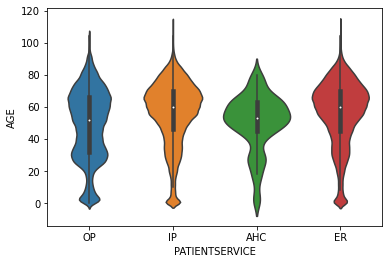

In [52]:
sns.violinplot(x ="PATIENTSERVICE",
             y ="AGE",
             data = data)

In [ ]:
PATIENTSERVICE

In [37]:
from collections import defaultdict

data_dict_1 = defaultdict(list)

data_dict_1['a'].append(1)
data_dict_1['b'].append(2)
data_dict_1['a'].append(3)
data_dict_1['c'].append(1)


data_dict_1

defaultdict(list, {'a': [1, 3], 'b': [2], 'c': [1]})

In [20]:
final.to_csv("for_val_match21.csv")